# Esercizio 11.2

In questo caso si tratta di una funzione non lineare per cui è impossibile creare una rete neurale che la approssimi usando come funzione di attivazione la funzione identità. Ho utilizzato la funzione softplus essendo una funzione senza plateau dato che in questo caso la funzione da fittare non era limitata. Poi ho provato ad allenare con soli due neuroni e quindi 4 parametri liberi, che è il numero di parametri che caratterizzano il polinomio f(x), tuttavia non sono riuscito a ottenere neanche la forma a doppia concavità della f. Ho provato poi con 6+6+6+1=5 neuroni e ho diminuito la dimensione delle batch e la sigma perchè nell'intervallo [ -1,1] la funzione in questione varia "velocemente" vicino agli estremi.

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [2]:
# target parameters of f(x) = 3x^3 -2x^2 - 3x + 4
def f_x(x):
    a = 3
    b = -2
    c = -3
    d = 4
    return a*x**3 + b*x**2 + c*x + d

In [3]:
N_train = 100000
N_valid = 10000
sigma = 0.01
batch_sz = 3
N_epoch = 10
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = f_x(x_valid) # ideal (target) function

y_train = np.random.normal(f_x(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f_x(x_valid), sigma)

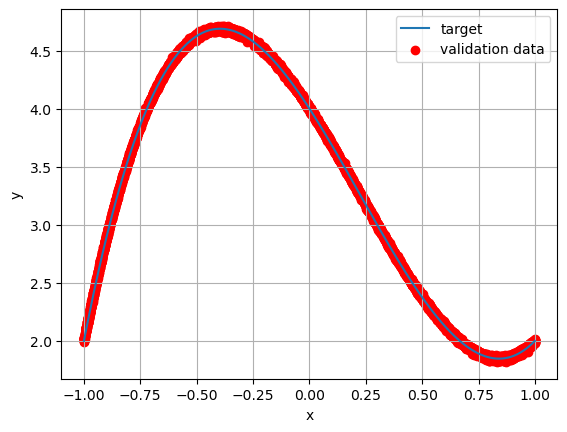

In [4]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# compose the NN model

model = tf.keras.Sequential()
model.add(Dense(6,input_shape=(1,), activation='softplus'))
model.add(Dense(6,activation='softplus'))
model.add(Dense(6,activation='softplus'))
model.add(Dense(1,activation='softplus'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch_sz, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/10
33334/33334 [==============================] - 50s 1ms/step - loss: 0.0534 - mse: 0.0534 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2/10
33334/33334 [==============================] - 58s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3/10
33334/33334 [==============================] - 61s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/10
33334/33334 [==============================] - 59s 2ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/10
33334/33334 [==============================] - 60s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/10
33334/33334 [==============================] - 61s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/10
33334/33334 [==============================] - 62s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.9584e-04 - val_mse: 9.9584e-04
Epoch 8/10
33334/33334 [=========

200/200 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    

Test loss: 0.0012952442048117518
Test accuracy: 0.0012952442048117518


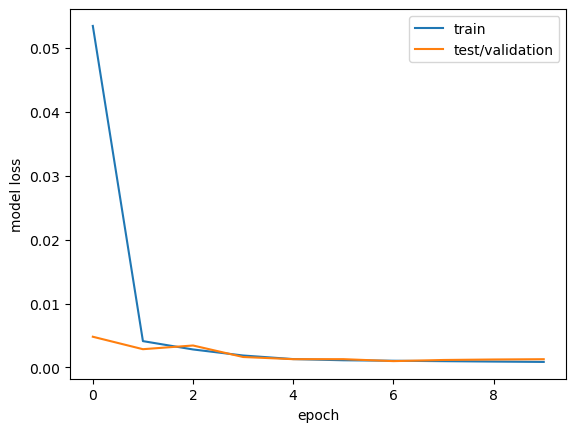

In [8]:
score = model.evaluate(x_valid, y_valid, batch_size=50, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

10/10 [==============================] - 0s 1ms/step


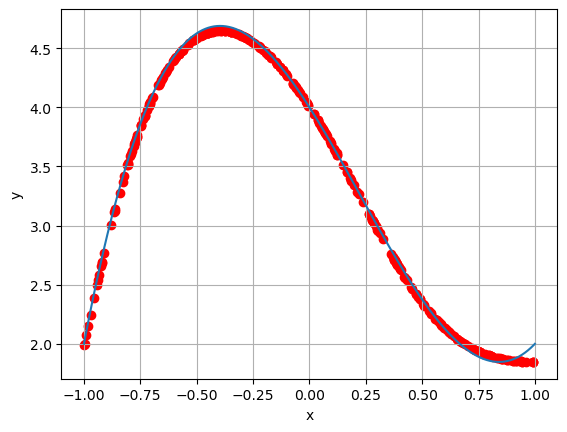

In [9]:
x_predicted = np.random.uniform(-1, 1, 300)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

10/10 [==============================] - 0s 1ms/step


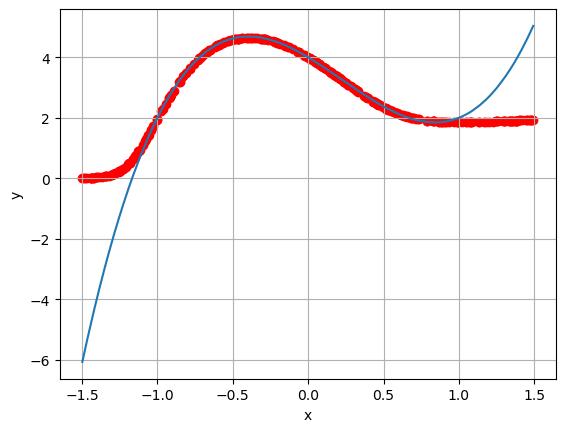

In [10]:
x_predicted = np.random.uniform(-1.5, 1.5, 300)
x_predicted.sort()
y_target = f_x(x_predicted)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, y_target)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Evidentemente la rete neurale riesce a fittare bene la funzione nell'intervallo su cui è stata allenata al di fuori di esso è imprevedibile. Il numero di parametri della rete in generale è più grande del numero di parametri liberi che caratterizzano il sistema da studiare, questo perchè la rete neurale è in sostanza una funzione complicata che nella maggior parte dei casi è diversa da quella esatta, ma che la approssima con una certa precisione.

# Esercizio 11.3

stavolta dato che la funzione seno è limitata uso come funzione di attivazione tanh che inoltre è pure una funzione trigonometrica quindi dovrebbe facilitare l'apprendimento.

In [65]:
# f(x,y) = sin(x^2 + y^2)
N_train = 10000
N_valid = 1000
sigma = 0.1
batch_sz = 30
N_epoch = 100

In [66]:
%%time
# generate training inputs

np.random.seed(0)
x_min = -3/2
x_max = 3/2
y_min = -3/2
y_max = 3/2

x_train = np.random.uniform(x_min, x_max, N_train)
y_train = np.random.uniform(y_min, y_max, N_train)
R_train = x_train**2 + y_train**2

x_valid = np.random.uniform(x_min, x_max, N_valid)
y_valid = np.random.uniform(y_min, y_max, N_valid)
x_valid.sort()
y_valid.sort()
R_valid = x_valid**2 + y_valid**2

z_train = np.random.normal(np.sin(R_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(R_valid), sigma)

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [67]:
%%time
#reshape the contents of the train arrays
input_train = np.zeros((N_train,2))
input_valid = np.zeros((N_valid,2))
for i in range(N_train):
    input_train[i,0] = x_train[i]
    input_train[i,1] = y_train[i]
    
for i in range(N_valid):
    input_valid[i,0] = x_valid[i]
    input_valid[i,1] = y_valid[i]

CPU times: total: 15.6 ms
Wall time: 7 ms


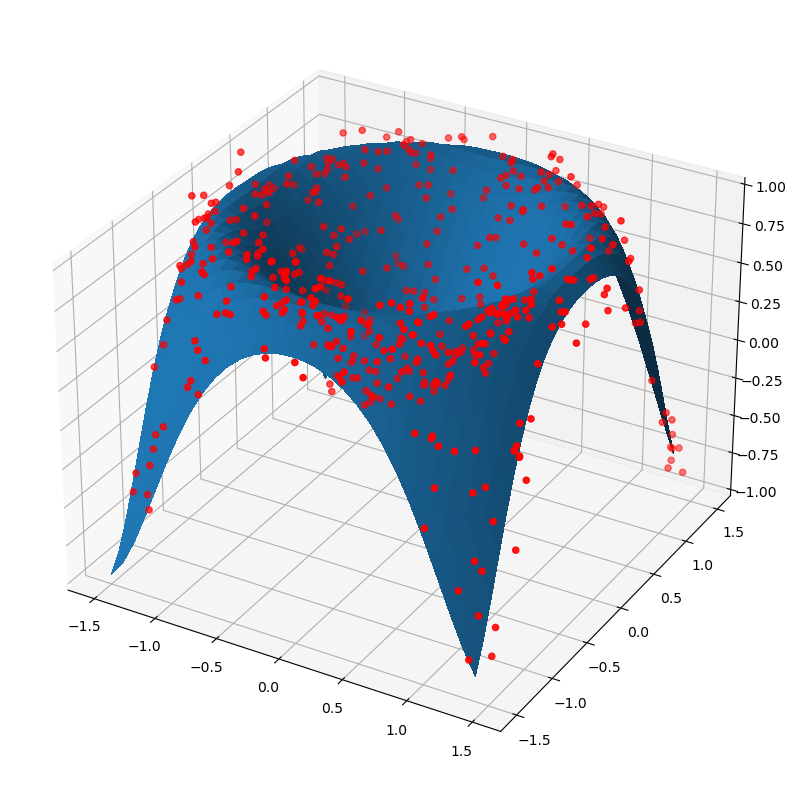

CPU times: total: 219 ms
Wall time: 220 ms


In [68]:
%%time
# plot validation and target dataset
x_target = np.arange(x_min, x_max, 0.1)
y_target = np.arange(y_min, y_max, 0.1)
x_target, y_target = np.meshgrid(x_target, y_target)
R_target = x_target**2 + y_target**2
z_target = np.sin(R_target)
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x_target, y_target, z_target, rstride=1, cstride=1, linewidth=0, antialiased=False)

ax.scatter(x_train[:500], y_train[:500], z_train[:500], color='r', label='validation data')
ax.set_zlim(-1, 1)
plt.grid(True)
plt.show()

In [69]:
# compose the NN model

model = tf.keras.Sequential()
model.add(Dense(6,input_shape=(2,), activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='tanh'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [70]:
# get a summary of our composed model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 18        
                                                                 
 dense_21 (Dense)            (None, 6)                 42        
                                                                 
 dense_22 (Dense)            (None, 6)                 42        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [71]:
%%time
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data

history = model.fit(x=input_train, y=z_train, 
          batch_size=batch_sz, epochs=N_epoch,
          #shuffle=True,  a good idea is to shuffle input before at each epoch
          validation_data=(input_valid, z_valid))

Epoch 1/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1823 - mse: 0.1823 - val_loss: 0.3858 - val_mse: 0.3858
Epoch 2/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1643 - mse: 0.1643 - val_loss: 0.3731 - val_mse: 0.3731
Epoch 3/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1638 - mse: 0.1638 - val_loss: 0.3744 - val_mse: 0.3744
Epoch 4/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1634 - mse: 0.1634 - val_loss: 0.3829 - val_mse: 0.3829
Epoch 5/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1629 - mse: 0.1629 - val_loss: 0.3674 - val_mse: 0.3674
Epoch 6/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1627 - mse: 0.1627 - val_loss: 0.3834 - val_mse: 0.3834
Epoch 7/200
334/334 [==============================] - 1s 2ms/step - loss: 0.1624 - mse: 0.1624 - val_loss: 0.3753 - val_mse: 0.3753
Epoch 8/200
334/334 [==============================] - 1s 2ms/step - 

334/334 [==============================] - 1s 2ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 63/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0721 - val_mse: 0.0721
Epoch 64/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 65/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 66/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 67/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 68/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 69/200
334/334 [==============================] - 1s 2ms/step - loss:

334/334 [==============================] - 1s 2ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 124/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 125/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 126/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 127/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 128/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 129/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 130/200
334/334 [==============================] - 1s 2ms/step 

Epoch 184/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 185/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 186/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 187/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 188/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 189/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 190/200
334/334 [==============================] - 1s 2ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 191/200
334/334 [==============================] 

34/34 [==============================] - 0s 1ms/step - loss: 0.0153 - mse: 0.0153

Test loss: 0.015337320044636726
Test accuracy: 0.015337320044636726


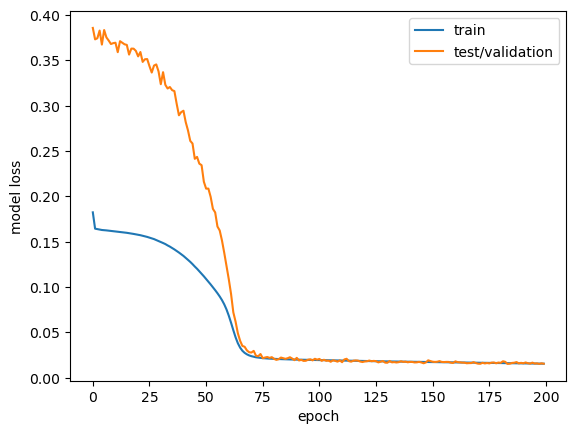

In [72]:
score = model.evaluate(input_valid, z_valid, batch_size=batch_sz, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

In [73]:
%%time
#create predicted values
N_predicted = 300
x_predicted = np.random.uniform(x_min, x_max, N_predicted)
y_predicted = np.random.uniform(y_min, y_max, N_predicted)

input_predicted = np.zeros((N_predicted,2))
for i in range(N_predicted):
    input_predicted[i,0] = x_predicted[i]
    input_predicted[i,1] = y_predicted[i]
    
z_predicted = model.predict(input_predicted)

10/10 [==============================] - 0s 2ms/step
CPU times: total: 234 ms
Wall time: 121 ms


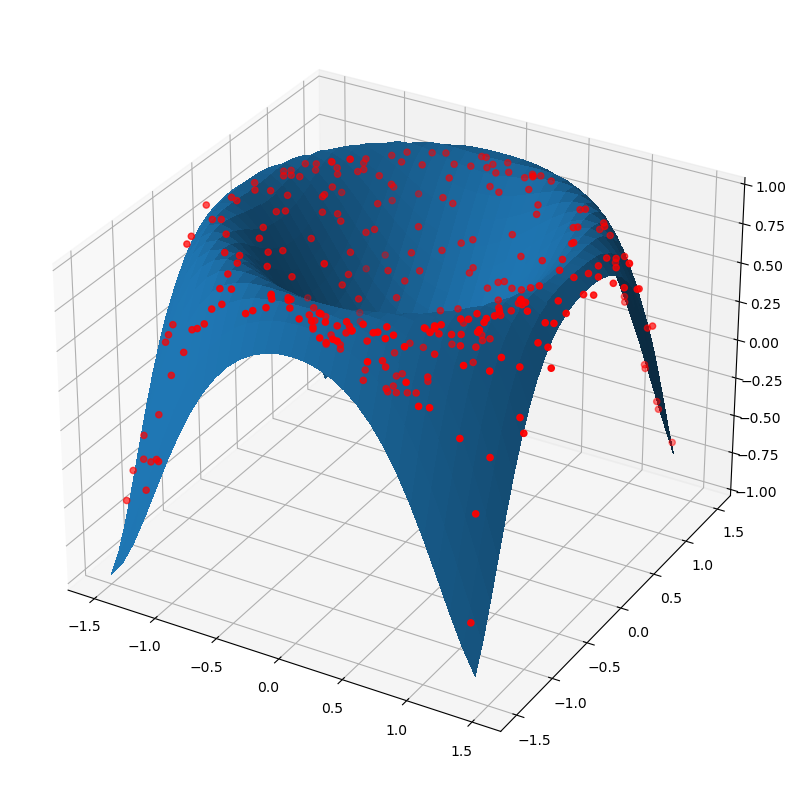

CPU times: total: 219 ms
Wall time: 216 ms


In [74]:
%%time
# plot target dataset and predicted values
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x_target, y_target, z_target, rstride=1, cstride=1, linewidth=0, antialiased=False)

ax.scatter(x_predicted, y_predicted, z_predicted, color='r', label='validation data')
ax.set_zlim(-1, 1)
plt.grid(True)
plt.show()